In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
wine = pd.read_csv('./Datasets/with_custom_class.csv')

In [3]:
wine.shape

(6497, 14)

In [4]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'color', 'acidity_levels'],
      dtype='object')

# Querying

We can issue a query to our dataframe or series just like we issue queries to SQL

In [5]:
medium_acidity_levels = wine.query("acidity_levels == 'Medium'")
medium_acidity_levels.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color,acidity_levels
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,Medium
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red,Medium
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,red,Medium
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red,Medium


Let's query `medium_acidity_levels` DF to get the wines with higher quality rate  
  
To accomplish such task we need to have the mean value first, then
Query our DF based on our query

In [6]:
# getting mean quality rating
mean_quality = wine.quality.mean()
mean_quality

5.818377712790519

In [7]:
# querying the DF based on the mean
high_quality = medium_acidity_levels.query('quality > @mean_quality')  # We use `@` to access variables inside a query string
high_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color,acidity_levels
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red,Medium
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,red,Medium
70,7.7,0.630,0.08,1.9,0.076,15.0,27.0,0.9967,3.32,0.54,9.5,6,red,Medium
99,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6,red,Medium
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6,red,Medium


In [8]:
# we can also use string formatting
high_quality = medium_acidity_levels.query(f'quality > {mean_quality}')
high_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color,acidity_levels
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red,Medium
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,red,Medium
70,7.7,0.630,0.08,1.9,0.076,15.0,27.0,0.9967,3.32,0.54,9.5,6,red,Medium
99,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6,red,Medium
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6,red,Medium


In [9]:
# Another string formatting
high_quality = medium_acidity_levels.query('quality > {}'.format(mean_quality))
high_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color,acidity_levels
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red,Medium
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,red,Medium
70,7.7,0.630,0.08,1.9,0.076,15.0,27.0,0.9967,3.32,0.54,9.5,6,red,Medium
99,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6,red,Medium
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6,red,Medium


# Matplotlib Plotting

In [26]:
import seaborn as sns
sns.set_style('darkgrid')
# Not important but it will make the drawing to appear appealing

Let's draw the comparison b/n read and white wine based on rating  
  
Let's filter each category alone

In [14]:
red = wine.query('color == "red"')
white = wine.query('color == "white"')

red.shape, white.shape

((1599, 14), (4898, 14))

Now let's group each category using the quality rating, then count the occurances  
Since the count value for each column is going to be the same, we can pick one of the columns

In [21]:
red_counts = red.groupby('quality').count()['color']
white_counts = white.groupby('quality').count()['color']

red_counts, white_counts

(quality
 3     10
 4     53
 5    681
 6    638
 7    199
 8     18
 Name: color, dtype: int64,
 quality
 3      20
 4     163
 5    1457
 6    2198
 7     880
 8     175
 9       5
 Name: color, dtype: int64)

Let's try to compare the red and white wine  
  
Before plotting, we need to make the two datasets have the same amount of elements since they don't sit together in the same plot

In [36]:
# To make the datasets equivalent
red_counts['9'] = 0

width = 0.35  # the width for the bars
indexes = np.arange(len(red_counts))  # the x locations

In [30]:
red_counts

quality
3     10
4     53
5    681
6    638
7    199
8     18
9      0
Name: color, dtype: int64

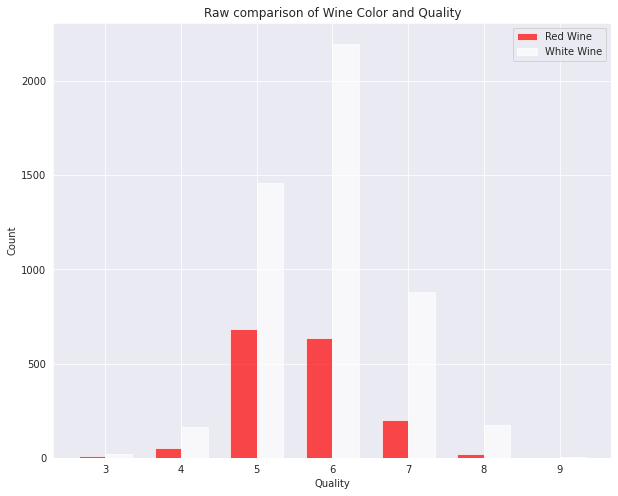

In [41]:
# Plotting the graphs
f, ax = plt.subplots(figsize=(10, 8))
plt.bar(indexes, red_counts, color='r', alpha=0.7, label='Red Wine', width=width)
plt.bar(indexes + width, white_counts, color='w', alpha=0.7, label='White Wine', width=width)

# Customizing the graph
plt.title('Raw comparison of Wine Color and Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

locations = indexes + width / 2  # to get x tick locations
# resetting the x ticks to their actual values
x_ticks = list(red_counts.index)
plt.xticks(locations, x_ticks)

# Showing the legend
plt.legend()

As we can see from the above graph, comparing the raw count isn't going to help us.  
In this case, the white wine have high data points than the red wines.  
So, let's take their proportions and draw the graph

In [42]:
red_counts = red_counts / len(red)
white_counts = white_counts / len(white)
red_counts, white_counts

(quality
 3    0.006254
 4    0.033146
 5    0.425891
 6    0.398999
 7    0.124453
 8    0.011257
 9    0.000000
 Name: color, dtype: float64,
 quality
 3    0.004083
 4    0.033279
 5    0.297468
 6    0.448755
 7    0.179665
 8    0.035729
 9    0.001021
 Name: color, dtype: float64)

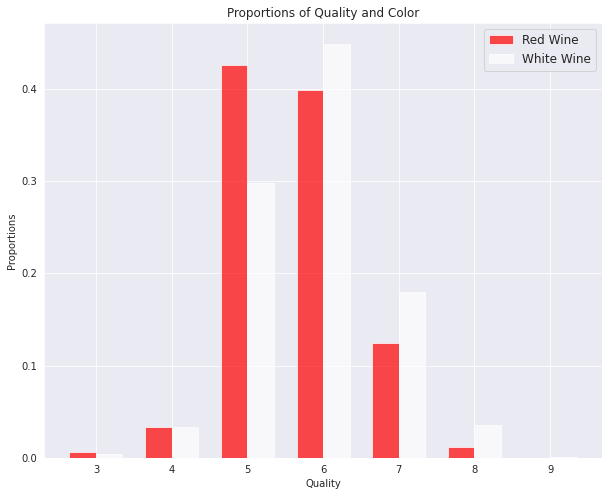

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(indexes, red_counts, width, color='r', alpha=0.7, label='Red Wine')
plt.bar(indexes + width, white_counts, width, color='w', alpha=0.7, label='White Wine')

plt.title("Proportions of Quality and Color")
plt.xlabel("Quality")
plt.ylabel("Proportions")
plt.xticks(locations, x_ticks)
plt.legend(fontsize=12)